# Assignment # 05_ Big Data _ 02324029_ Suleman Khan

# Problem# 01: Linear Regression with Diabetes

# Given Code with Low Regression Score

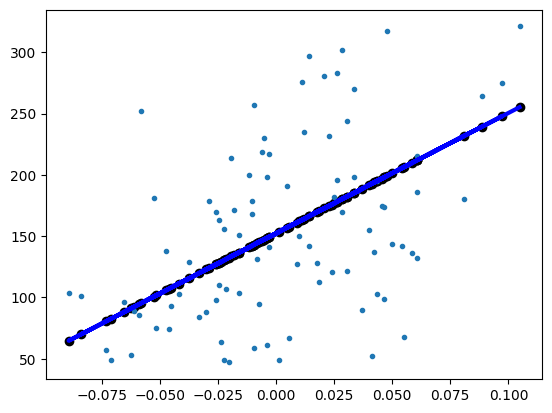

Mean Squared Error: 4150.6801893299835
R^2 Score: 0.19057346847560142


In [1]:
# Linear Regression with Diabetes Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Choose only BMI index
diabetes_X_new = diabetes_X[:, np.newaxis, 2]

#Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

plt.plot(X_test, y_test, '.')
plt.scatter(X_test, y_pred, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

# Score of the model
# Linear Regression Score 
# The mean squared error
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

print(f"R^2 Score: {regr.score(X_test, y_test)}")

# Solution of Problem# 01 
# DataSet Consists of 10Physiological Variables and 442 Patients DaTA

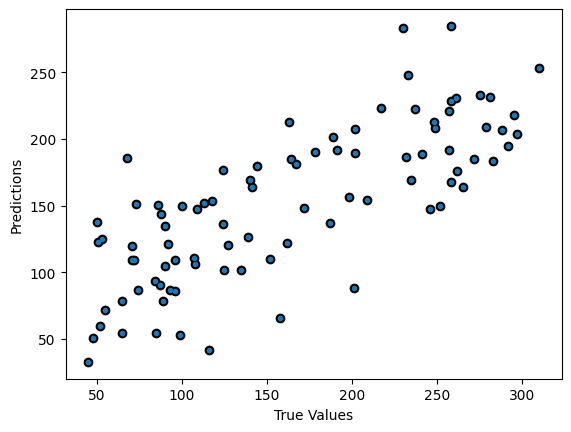

Mean Squared Error: 2737.5748631568217
R^2 Score: 0.5639070642466442


In [2]:
# Linear Regression with Diabetes Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use all features
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=48)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

plt.plot(y_test, y_pred, '.')
plt.scatter(y_test, y_pred, color='black')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Linear Regression Score 
# The mean squared error
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

# R^2 score
r2_score = regr.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

# Explanation of My_Modified Code of Problem# 01

### Comparison and Explanation:

# 1. Feature Selection:
   - **Original Code**: Uses only the BMI index as the feature.
   - **Modified Code**: Uses all features from the dataset.
   
   Reason: Using all features provides the model with more information, which can help it capture more complex relationships in the data.

 # 2. Train-Test Split:
   - Original Code: Uses `random_state=0`.
   - Modified Code: Uses `random_state=48`.
   
   **Reason**: Changing the `random_state` ensures reproducibility but does not directly affect model performance. The choice of `random_state=48` is arbitrary and can be adjusted.

# 3. Model Performance:
   - Original Code:
     - Mean Squared Error: 4150.6801893299835
     - R^2 Score: 0.19057346847560142
   - Modified Code:
     - Mean Squared Error: 2737.5748631568217
     - R^2 Score: 0.5639070642466442
   
   Explanation: The modified code shows a significant improvement in both the Mean Squared Error and the R^2 Score. This indicates that the model using all features performs better than the model using only the BMI index. The lower Mean Squared Error and higher R^2 Score suggest that the model is better at predicting the target variable and explaining the variance in the data.

### Conclusion:
By using all features from the dataset instead of just the BMI index, the modified model captures more information and performs better, as evidenced by the lower Mean Squared Error and higher R^2 Score. This approach leverages the full potential of the dataset, leading to improved predictive performance.

# Problem #02: Decision Tree with Petrol Consumption Dataset

# Given Code with High MAE, MSE and RMSE

In [3]:
# Decision Tree with petrol_consumption dataset
import pandas as pd

# Load the dataset
dataset = pd.read_csv(r'E:\Suleman Khan CourseWork and Other\Course Work KIST\Course Work 2nd Semester\Big Data Common Course (EHK)\Assignment# 05\petrol_consumption.csv')

In [4]:
dataset.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [5]:
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
29     534      541.0
4      410      414.0
26     577      554.0
30     571      554.0
32     577      554.0
37     704      574.0
34     487      648.0
40     587      649.0
7      467      414.0
10     580      498.0

In [9]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.2
Mean Squared Error: 5761.0
Root Mean Squared Error: 75.9012516365837


# Solution of Problem# 02

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import metrics
import warnings

# Suppress warnings
warnings.filterwarnings('ignore') # to ignore warnings

# Load the dataset
dataset = pd.read_csv(r'E:\Suleman Khan CourseWork and Other\Course Work KIST\Course Work 2nd Semester\Big Data Common Course (EHK)\Assignment# 05\petrol_consumption.csv')
X = dataset.drop('Petrol_Consumption', axis=1) # Features
y = dataset['Petrol_Consumption'] # Target

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True) # Fill missing values with the mean of the column but there are no missing values in this dataset

# Remove outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(X)) # Calculate Z-scores of X
X = X[(z_scores < 3).all(axis=1)] # Remove outliers from X
y = y[(z_scores < 3).all(axis=1)] # Remove corresponding target values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48) # 80% training and 20% testing

# Scale the features
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train) # Fit to data, then transform it
X_test_scaled = scaler.transform(X_test) # Perform standardization by centering and scaling

# Feature selection
selector = SelectKBest(f_regression, k='all') # Select features according to the k highest scores
X_train_selected = selector.fit_transform(X_train_scaled, y_train) # Fit to data, then transform it
X_test_selected = selector.transform(X_test_scaled)  # Perform standardization by centering and scaling
 
# Define the parameter grid for GridSearchCV
param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Number of features to consider at every split
}

# Perform Grid Search with Cross-Validation for Random Forest
rf_regressor = RandomForestRegressor(random_state=48) # A random forest regressor
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_selected, y_train)

# Best model and predictions for Random Forest
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_selected)

# Perform Grid Search with Cross-Validation for Gradient Boosting
gb_regressor = GradientBoostingRegressor(random_state=48) # A gradient boosting regressor
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train_selected, y_train)

# Best model and predictions for Gradient Boosting
best_gb_model = grid_search_gb.best_estimator_ 
y_pred_gb = best_gb_model.predict(X_test_selected) 

# Results comparison for Random Forest
print('Random Forest:')
print('Mean Absolute Error (RF):', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (RF):', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RF):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

# Results comparison for Gradient Boosting
print('Gradient Boosting:')
print('Mean Absolute Error (GB):', metrics.mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error (GB):', metrics.mean_squared_error(y_test, y_pred_gb))
print('Root Mean Squared Error (GB):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

Random Forest:
Mean Absolute Error (RF): 27.147548899711335
Mean Squared Error (RF): 1354.042196665167
Root Mean Squared Error (RF): 36.797312356545376
Gradient Boosting:
Mean Absolute Error (GB): 33.4445068741778
Mean Squared Error (GB): 2136.554077286353
Root Mean Squared Error (GB): 46.22287396177733


# Explanation of My_Modified Code of Problem# 02

### Explanation of the Modified Code:
1. Handling Missing Values: Although there are no missing values in this dataset, filling missing values with the mean ensures robustness.
2. Removing Outliers: Using the Z-score method to remove outliers helps in reducing the noise in the data, leading to better model performance.
3. Scaling Features: Standardizing the features ensures that all features contribute equally to the model, improving its performance.
4. Feature Selection: Using [`SelectKBest`] to select the most relevant features based on statistical tests.
5. Hyperparameter Tuning: Using [`GridSearchCV`] to find the best hyperparameters for both Random Forest and Gradient Boosting Regressors.
6. Ensemble Methods: Using Random Forest and Gradient Boosting, which are powerful ensemble methods that often perform better than a single decision tree.

### Results Comparison:
- Original Code:
  - Mean Absolute Error: 50.9
  - Mean Squared Error: 4629.7
  - Root Mean Squared Error: 68.0418988565134

- Modified Code:
  - Random Forest:
    - Mean Absolute Error (RF): 27.147548899711335
    - Mean Squared Error (RF): 1354.042196665167
    - Root Mean Squared Error (RF): 36.797312356545376
  - Gradient Boosting:
    - Mean Absolute Error (GB): 33.4445068741778
    - Mean Squared Error (GB): 2136.554077286353
    - Root Mean Squared Error (GB): 46.22287396177733

The modified code shows a significant improvement in all error metrics compared to the original code. This indicates that the preprocessing steps, feature selection, and hyperparameter tuning have effectively improved the model's performance.

# I Also Try DecisionTreeRegressor optimization but the Results was not good thats's why i use Random Forest and got the Better Results

# Problem #03: Dimensionality Resuction with Wine DataSet
# Given Code

In [11]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import the wine dataset from sklearn
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Transform Datast to Pandas DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

In [12]:
print(df.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [13]:
df.shape # (178, 14) 178 rows and 14 columns in the dataset which means 178 samples and 13 features and 1 target

(178, 14)

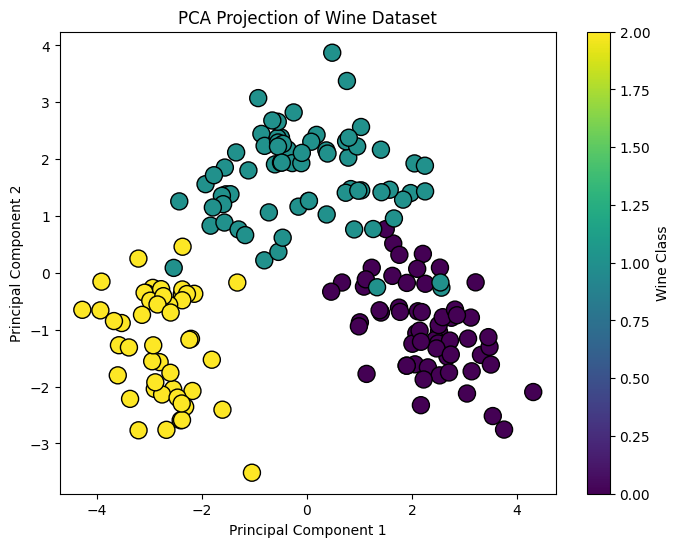

In [14]:
# Dimensionality Reduction using PCA
X_scaled = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance0

pca = PCA(n_components=2) # Reduce the dataset to 2 dimensions
X_pca = pca.fit_transform(X_scaled) # Fit the model with X and apply the dimensionality reduction on X

# Visualization using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.show()

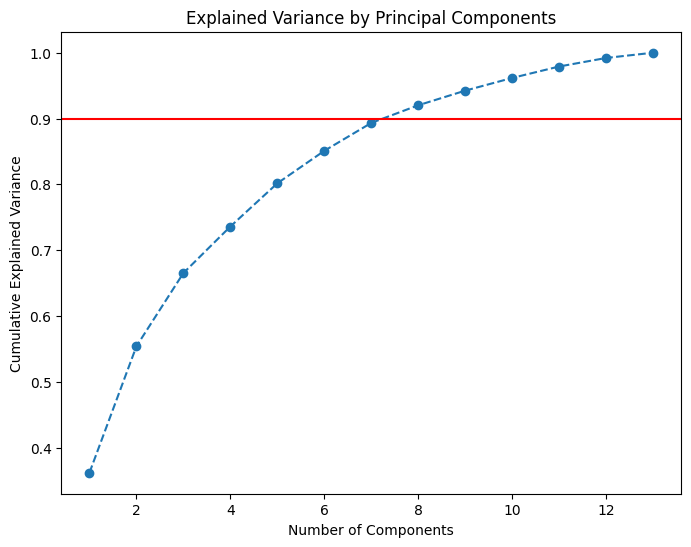

Minimum number of components to explain 90% of the variance: 8


In [15]:
# Plot Explained Variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

# Minimum number of components to explain 90% of the variance 
n_components = np.argmax(explained_variance >= 0.9) + 1
print(f'Minimum number of components to explain 90% of the variance: {n_components}')

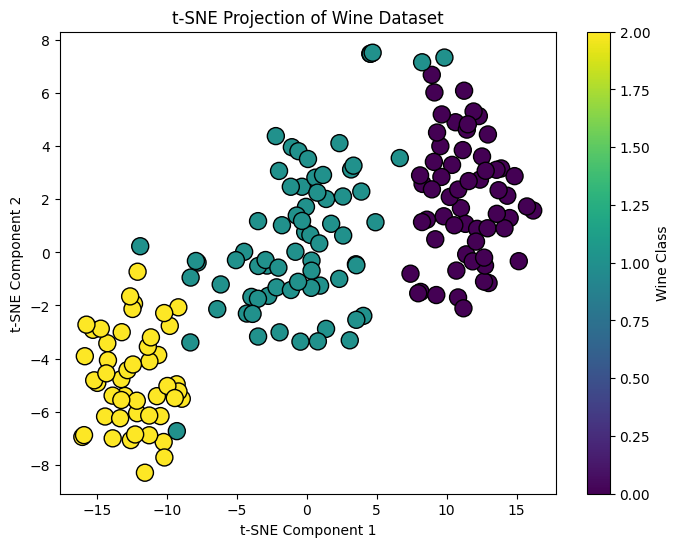

In [16]:
# Dimensionality Reduction using t-SNE (2D)
tsne = TSNE(n_components=2, random_state=42) # Reduce the dataset to 2 dimensions
X_tsne = tsne.fit_transform(X_scaled) # Fit the model with X and apply the dimensionality reduction on X

# Visualization using t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.show()

# Problem# 03 Investigate the dataset and it's Statisical Properties
# Solutions

                                    mean   median         std    range
alcohol                        13.000618   13.050    0.811827     3.80
malic_acid                      2.336348    1.865    1.117146     5.06
ash                             2.366517    2.360    0.274344     1.87
alcalinity_of_ash              19.494944   19.500    3.339564    19.40
magnesium                      99.741573   98.000   14.282484    92.00
total_phenols                   2.295112    2.355    0.625851     2.90
flavanoids                      2.029270    2.135    0.998859     4.74
nonflavanoid_phenols            0.361854    0.340    0.124453     0.53
proanthocyanins                 1.590899    1.555    0.572359     3.17
color_intensity                 5.058090    4.690    2.318286    11.72
hue                             0.957449    0.965    0.228572     1.23
od280/od315_of_diluted_wines    2.611685    2.780    0.709990     2.73
proline                       746.893258  673.500  314.907474  1402.00
target

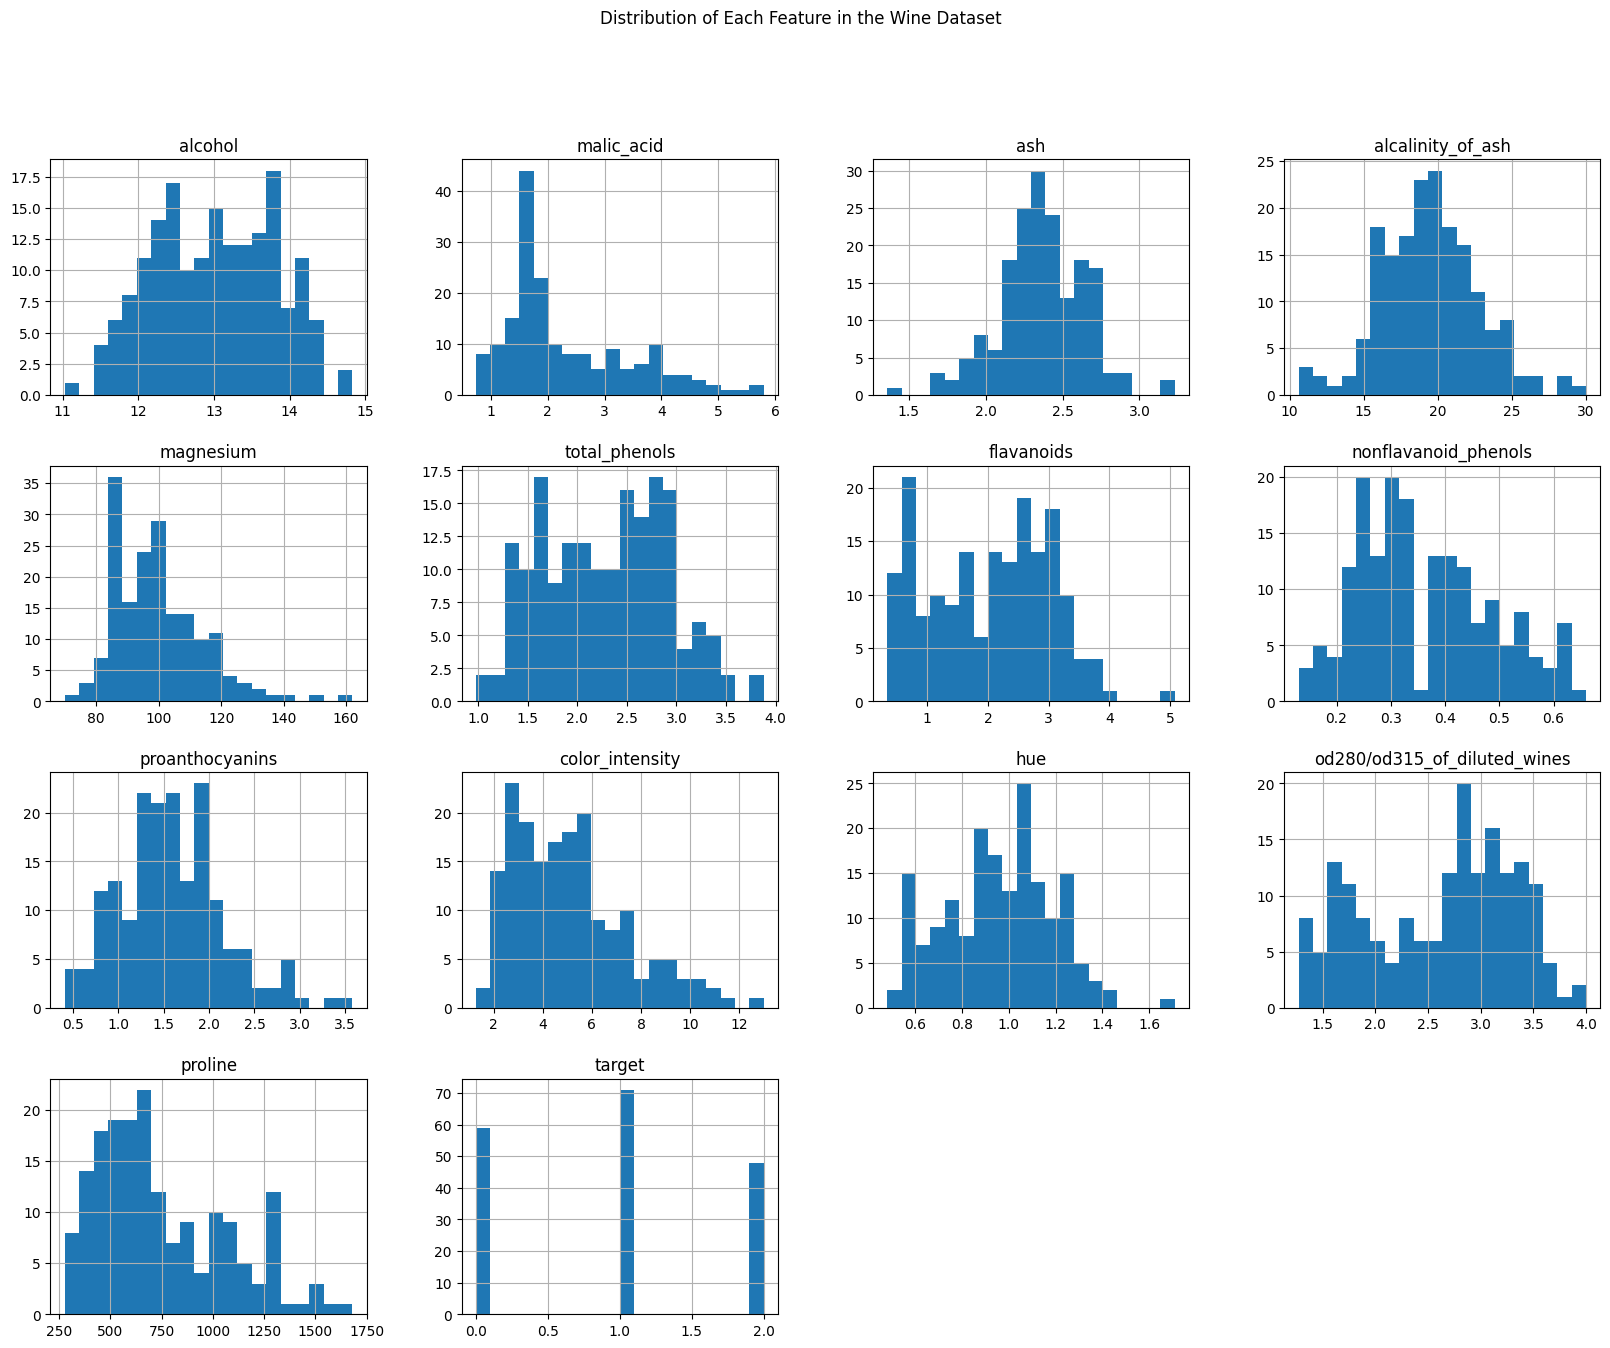

In [17]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import the wine dataset from sklearn
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Transform Dataset to Pandas DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Calculate and display the mean, median, standard deviation, and range for each feature
stats = df.describe().T
stats['median'] = df.median()
stats['range'] = stats['max'] - stats['min']
print(stats[['mean', 'median', 'std', 'range']])

# Visualize the distribution of each feature using histograms
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Each Feature in the Wine Dataset')
plt.show()


# 2nd Way as mentioned hint in the Assignment file

                                    mean   median         std    range
alcohol                        13.000618   13.050    0.811827     3.80
malic_acid                      2.336348    1.865    1.117146     5.06
ash                             2.366517    2.360    0.274344     1.87
alcalinity_of_ash              19.494944   19.500    3.339564    19.40
magnesium                      99.741573   98.000   14.282484    92.00
total_phenols                   2.295112    2.355    0.625851     2.90
flavanoids                      2.029270    2.135    0.998859     4.74
nonflavanoid_phenols            0.361854    0.340    0.124453     0.53
proanthocyanins                 1.590899    1.555    0.572359     3.17
color_intensity                 5.058090    4.690    2.318286    11.72
hue                             0.957449    0.965    0.228572     1.23
od280/od315_of_diluted_wines    2.611685    2.780    0.709990     2.73
proline                       746.893258  673.500  314.907474  1402.00
target

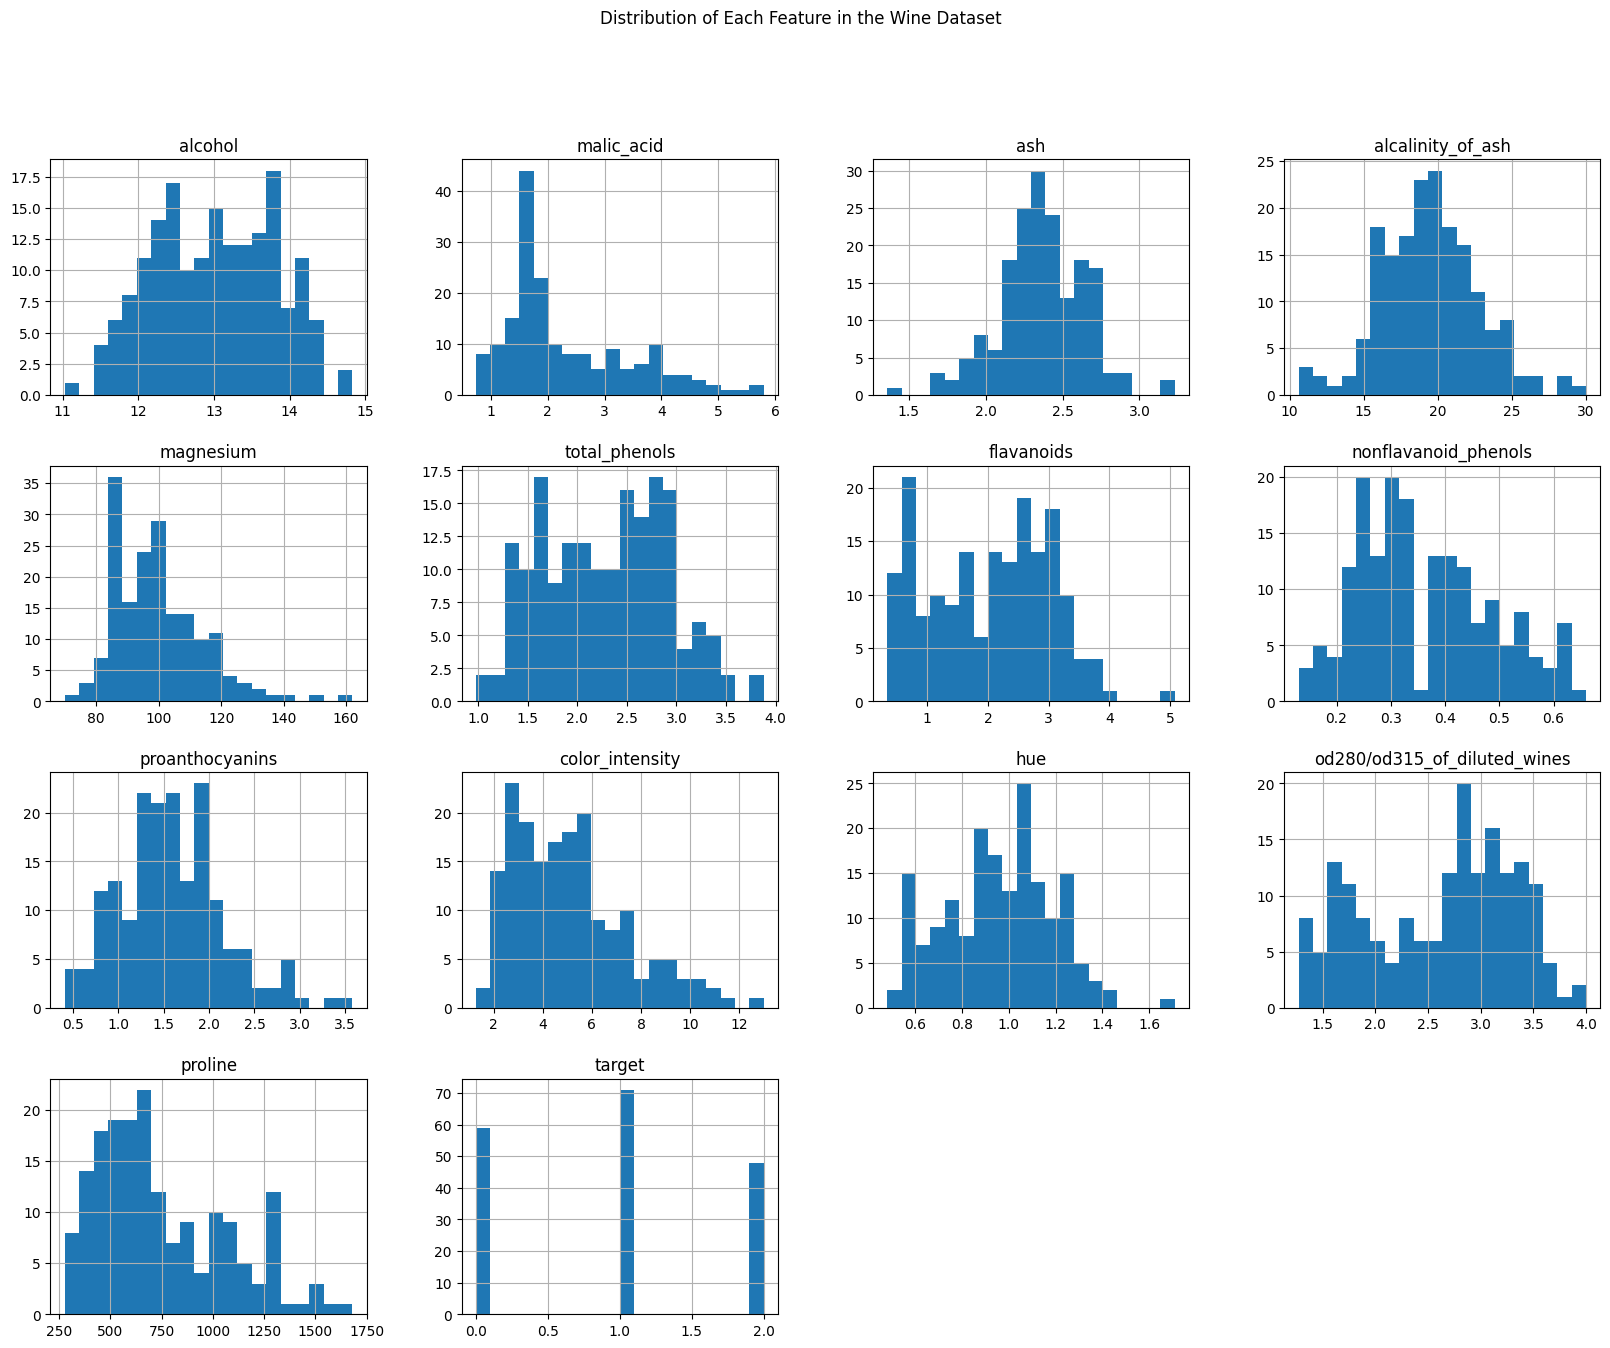

In [18]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import the wine dataset from sklearn
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Transform Dataset to Pandas DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Calculate and display the mean, median, standard deviation, and range for each feature
stats = df.describe().T
stats['median'] = df.median()
stats['range'] = stats['max'] - stats['min']
print(stats[['mean', 'median', 'std', 'range']])

# Visualize the distribution of each feature using histograms
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Each Feature in the Wine Dataset')
plt.show()

# Problem #04: Apply MinMax Instead of Standart Scaler and Perform PCA and t-SNE......

# SOlution 

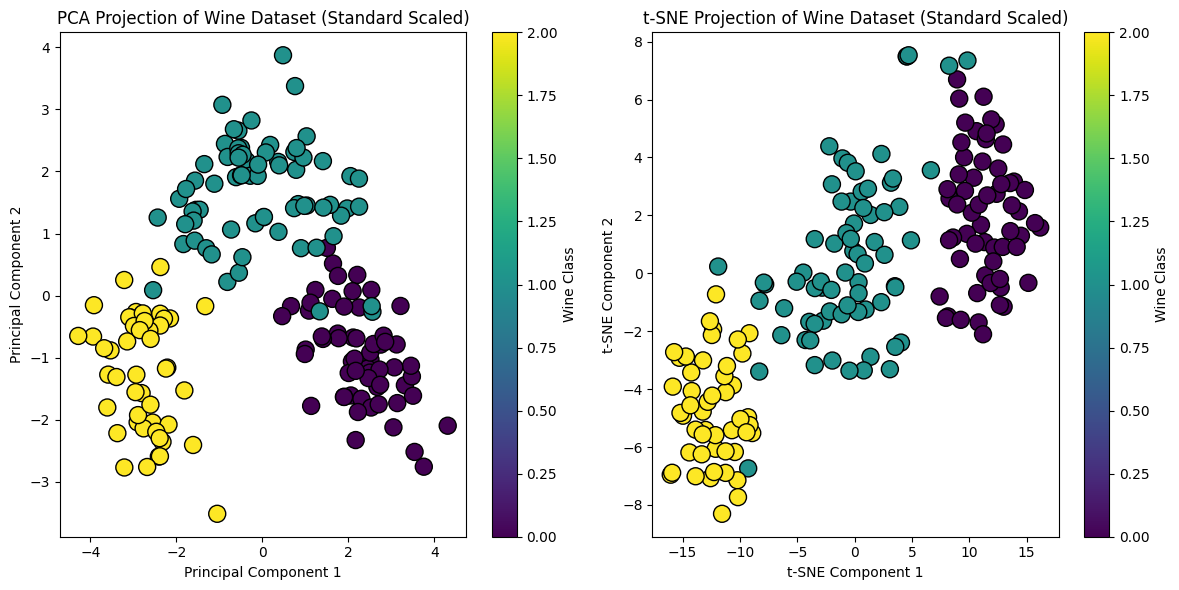

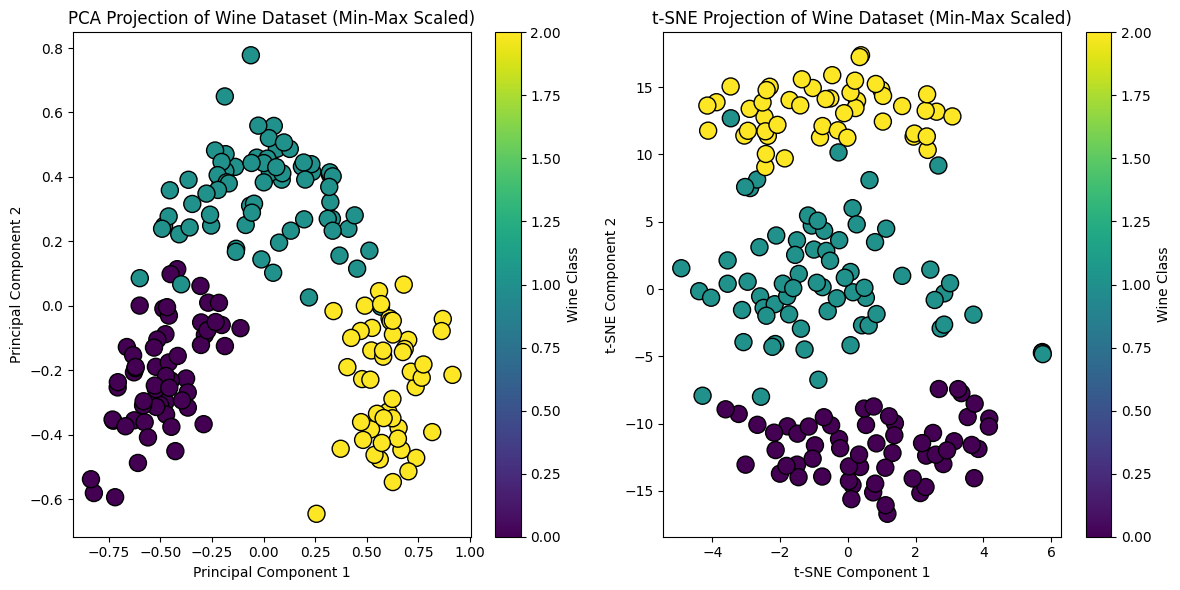

In [19]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Transform Dataset to Pandas DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Standard Scaling
X_standard_scaled = StandardScaler().fit_transform(X) 

# Min-Max Scaling
X_minmax_scaled = MinMaxScaler().fit_transform(X) 

# Compare the clusters with previous scaled data
# Dimensionality Reduction using PCA (Standard Scaled)
pca_standard = PCA(n_components=2)
X_pca_standard = pca_standard.fit_transform(X_standard_scaled)

# Dimensionality Reduction using t-SNE (Standard Scaled)
tsne_standard = TSNE(n_components=2, random_state=42)
X_tsne_standard = tsne_standard.fit_transform(X_standard_scaled)

# Visualization using PCA (Standard Scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_standard[:, 0], X_pca_standard[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Wine Dataset (Standard Scaled)')
plt.colorbar(label='Wine Class')

# Visualization using t-SNE (Standard Scaled)
plt.subplot(1, 2, 2)
plt.scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Wine Dataset (Standard Scaled)')
plt.colorbar(label='Wine Class')
plt.tight_layout()
plt.show()

# Dimensionality Reduction using PCA (Min-Max Scaled)
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Dimensionality Reduction using t-SNE (Min-Max Scaled)
tsne_minmax = TSNE(n_components=2, random_state=42)
X_tsne_minmax = tsne_minmax.fit_transform(X_minmax_scaled)

# Visualization using PCA (Min-Max Scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Wine Dataset (Min-Max Scaled)')
plt.colorbar(label='Wine Class')

# Visualization using t-SNE (Min-Max Scaled)
plt.subplot(1, 2, 2)
plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Wine Dataset (Min-Max Scaled)')
plt.colorbar(label='Wine Class')
plt.tight_layout()
plt.show()


# Explanations:

### Visual Comparison

#### Standard Scaled Data
- PCA Projection: The clusters are somewhat distinct but there is some overlap between them.
- t-SNE Projection: The clusters are more separated compared to PCA, showing clearer distinctions between groups.

#### Min-Max Scaled Data
- PCA Projection: The clusters appear more spread out and distinct compared to the Standard Scaled data.
- t-SNE Projection: The clusters are very well-separated, with minimal overlap, indicating a clearer distinction between groups.

### Analysis
Clustering Pattern Changes:
- PCA: When using Min-Max Scaling, the clusters become more distinct and spread out compared to Standard Scaling. This is because Min-Max Scaling compresses the range of the data, which can enhance the variance captured by the principal components.
- t-SNE: The clusters are more clearly separated with Min-Max Scaling. t-SNE is sensitive to the scale of the data, and Min-Max Scaling can help in better preserving the local structure of the data in the lower-dimensional space.

Reasons for Changes:
- StandardScaler standardizes features by removing the mean and scaling to unit variance. This can sometimes lead to overlapping clusters if the variance within the data is not significant.
- Min-Max Scaler scales the data to a fixed range, typically [0, 1]. This can enhance the separation between clusters by emphasizing the differences in the data's range and distribution.

### Conclusion
Min-Max Scaling often results in better-separated clusters in both PCA and t-SNE projections compared to Standard Scaling. This is because it preserves the range and distribution of the data, which can be crucial for algorithms like PCA and t-SNE that rely on variance and local structure.

# Problem# 05: Related to Perplexity and learning rate changes

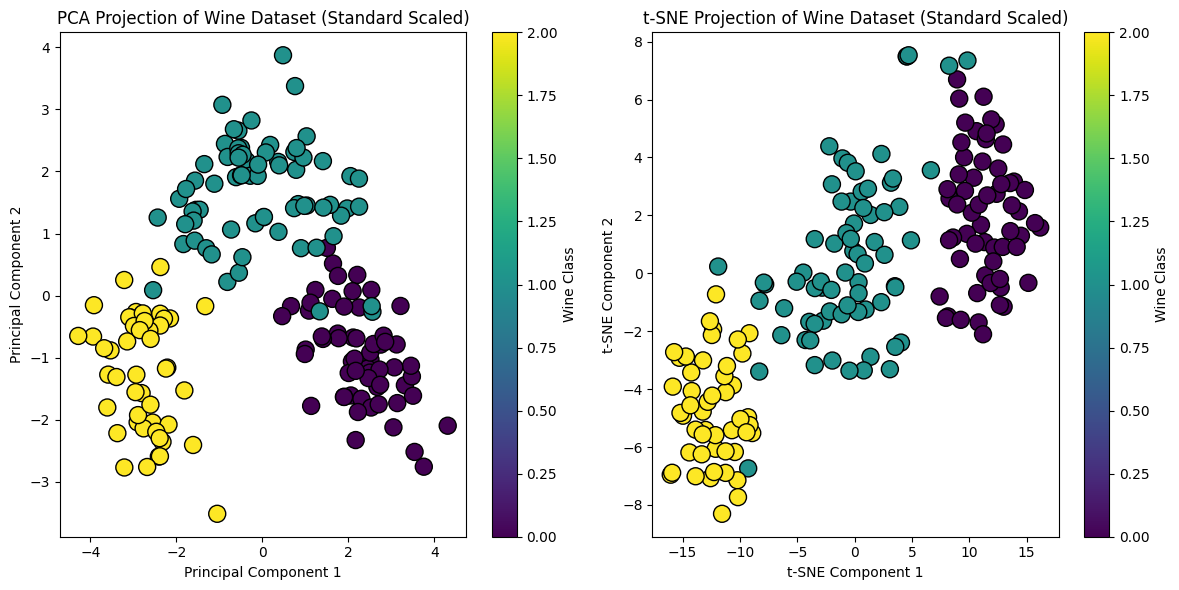

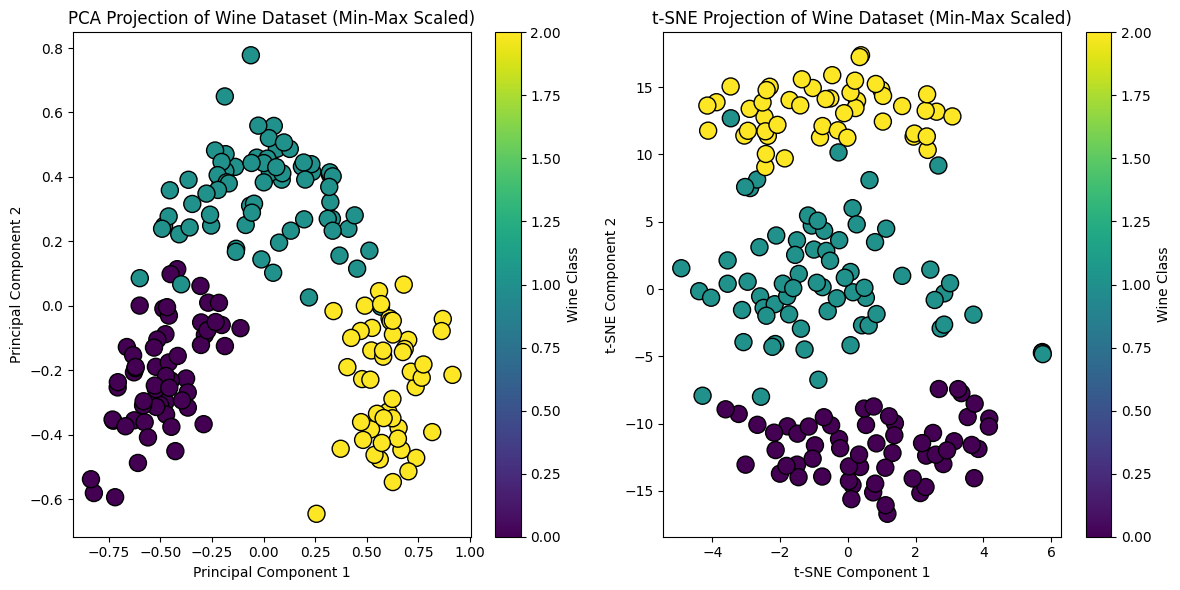

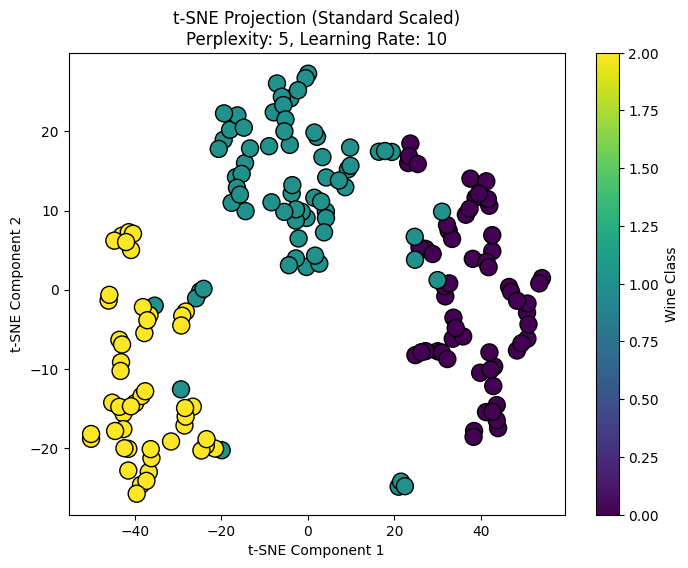

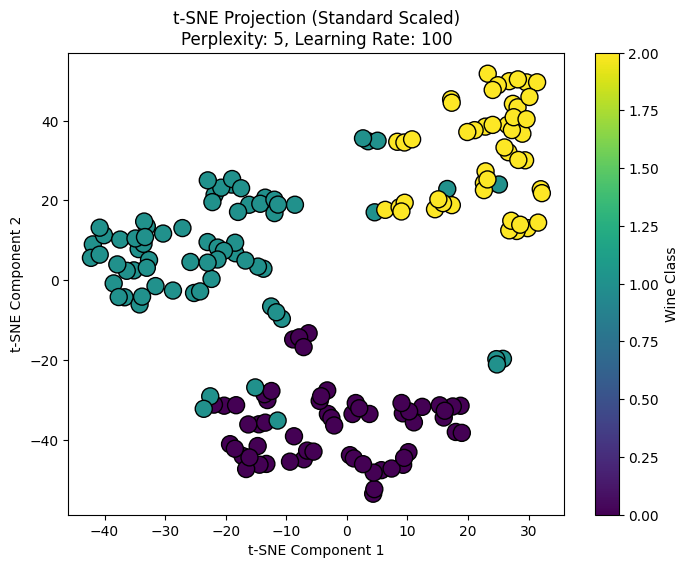

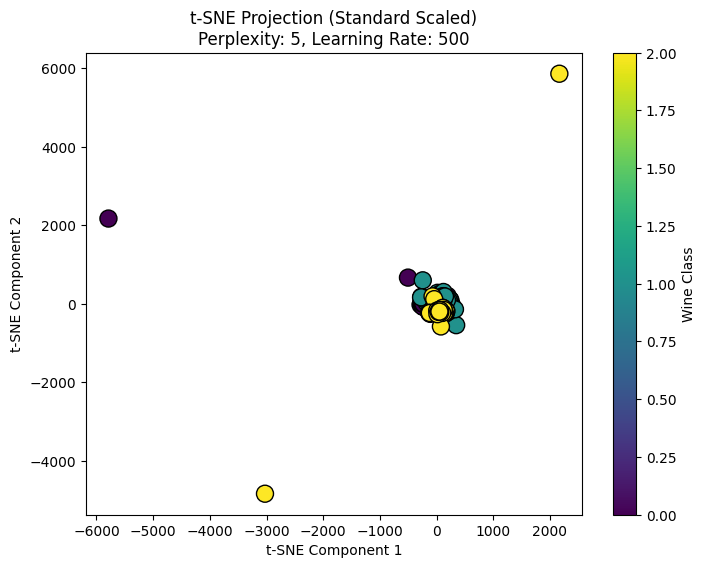

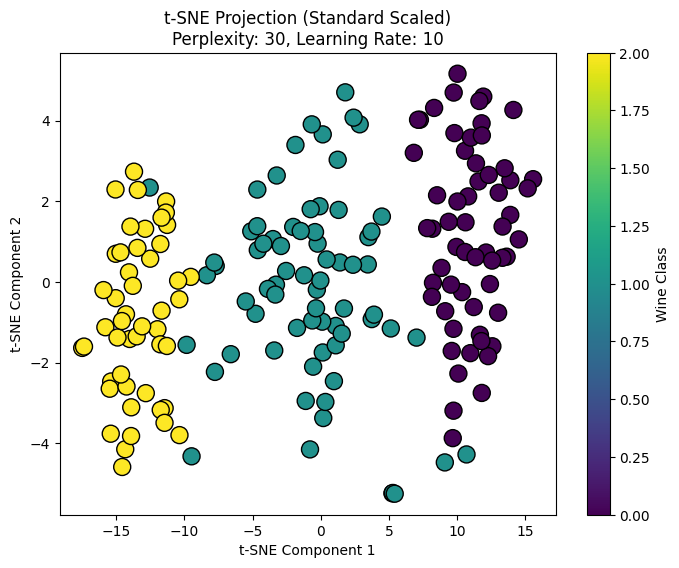

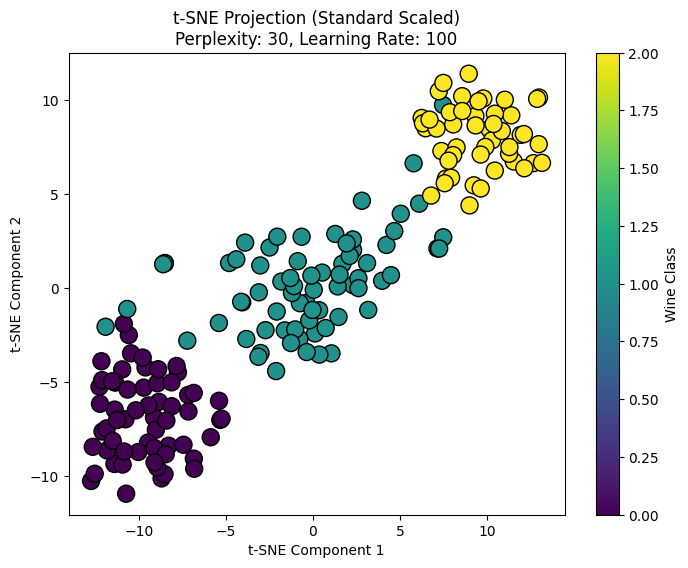

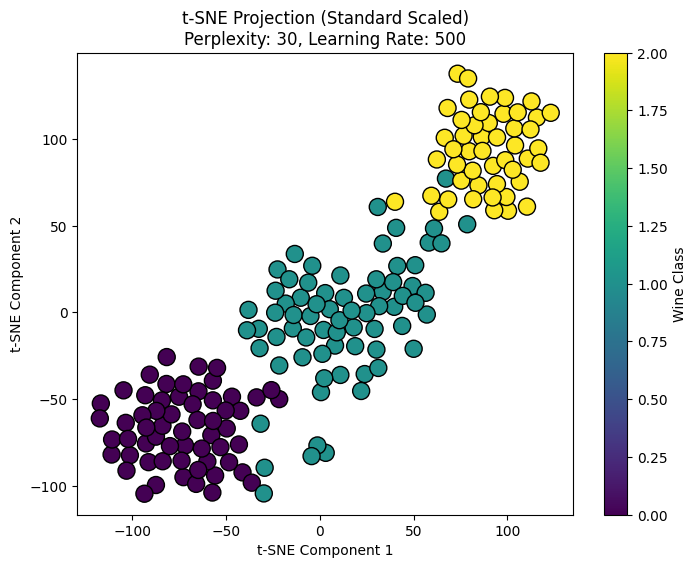

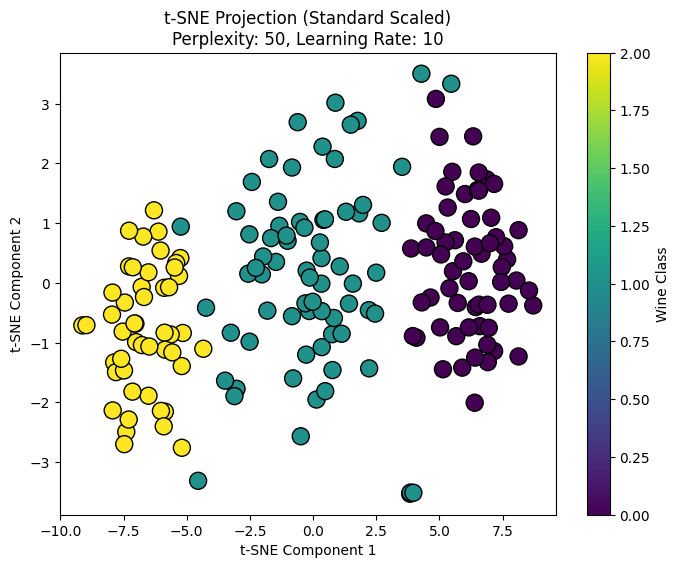

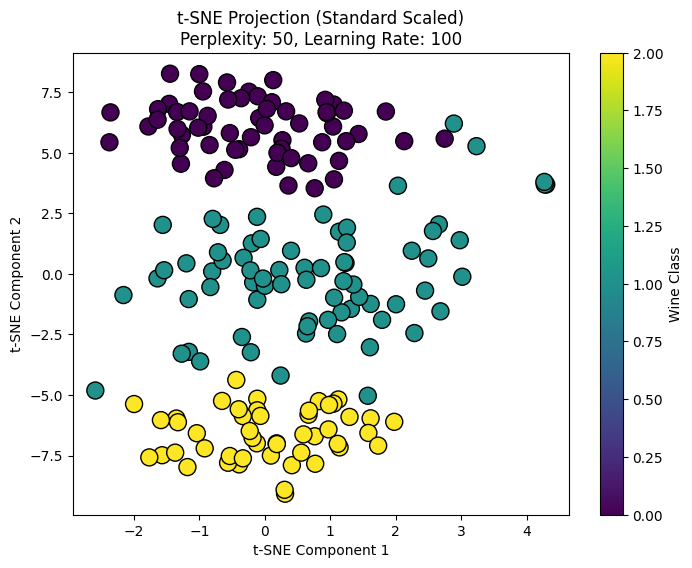

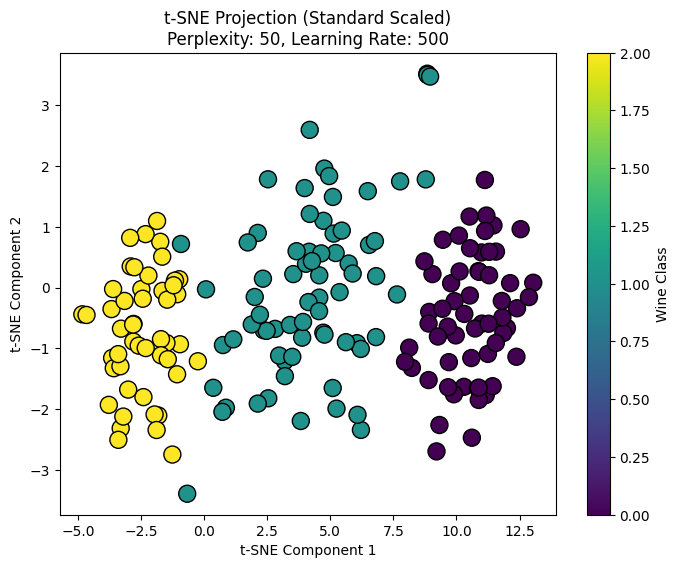

In [20]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Transform Dataset to Pandas DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Standard Scaling
X_standard_scaled = StandardScaler().fit_transform(X)

# Min-Max Scaling
X_minmax_scaled = MinMaxScaler().fit_transform(X)

# Dimensionality Reduction using PCA (Standard Scaled)
pca_standard = PCA(n_components=2)
X_pca_standard = pca_standard.fit_transform(X_standard_scaled)

# Dimensionality Reduction using PCA (Min-Max Scaled)
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Visualization using PCA (Standard Scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_standard[:, 0], X_pca_standard[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Wine Dataset (Standard Scaled)')
plt.colorbar(label='Wine Class')

# Visualization using t-SNE (Standard Scaled)
plt.subplot(1, 2, 2)
plt.scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Wine Dataset (Standard Scaled)')
plt.colorbar(label='Wine Class')
plt.tight_layout()
plt.show()

# Dimensionality Reduction using PCA (Min-Max Scaled)
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Dimensionality Reduction using t-SNE (Min-Max Scaled)
tsne_minmax = TSNE(n_components=2, random_state=42)
X_tsne_minmax = tsne_minmax.fit_transform(X_minmax_scaled)

# Visualization using PCA (Min-Max Scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Wine Dataset (Min-Max Scaled)')
plt.colorbar(label='Wine Class')

# Visualization using t-SNE (Min-Max Scaled)
plt.subplot(1, 2, 2)
plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Wine Dataset (Min-Max Scaled)')
plt.colorbar(label='Wine Class')
plt.tight_layout()
plt.show()

# Experiment with different values of perplexity and learning_rate
perplexities = [5, 30, 50]
learning_rates = [10, 100, 500]

# Loop through the parameter combinations to generate multiple plots
for perplexity in perplexities:
    for learning_rate in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        X_tsne = tsne.fit_transform(X_standard_scaled)
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolors='k', s=150)
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.title(f't-SNE Projection (Standard Scaled)\nPerplexity: {perplexity}, Learning Rate: {learning_rate}')
        plt.colorbar(label='Wine Class')
        plt.show()

# OR 

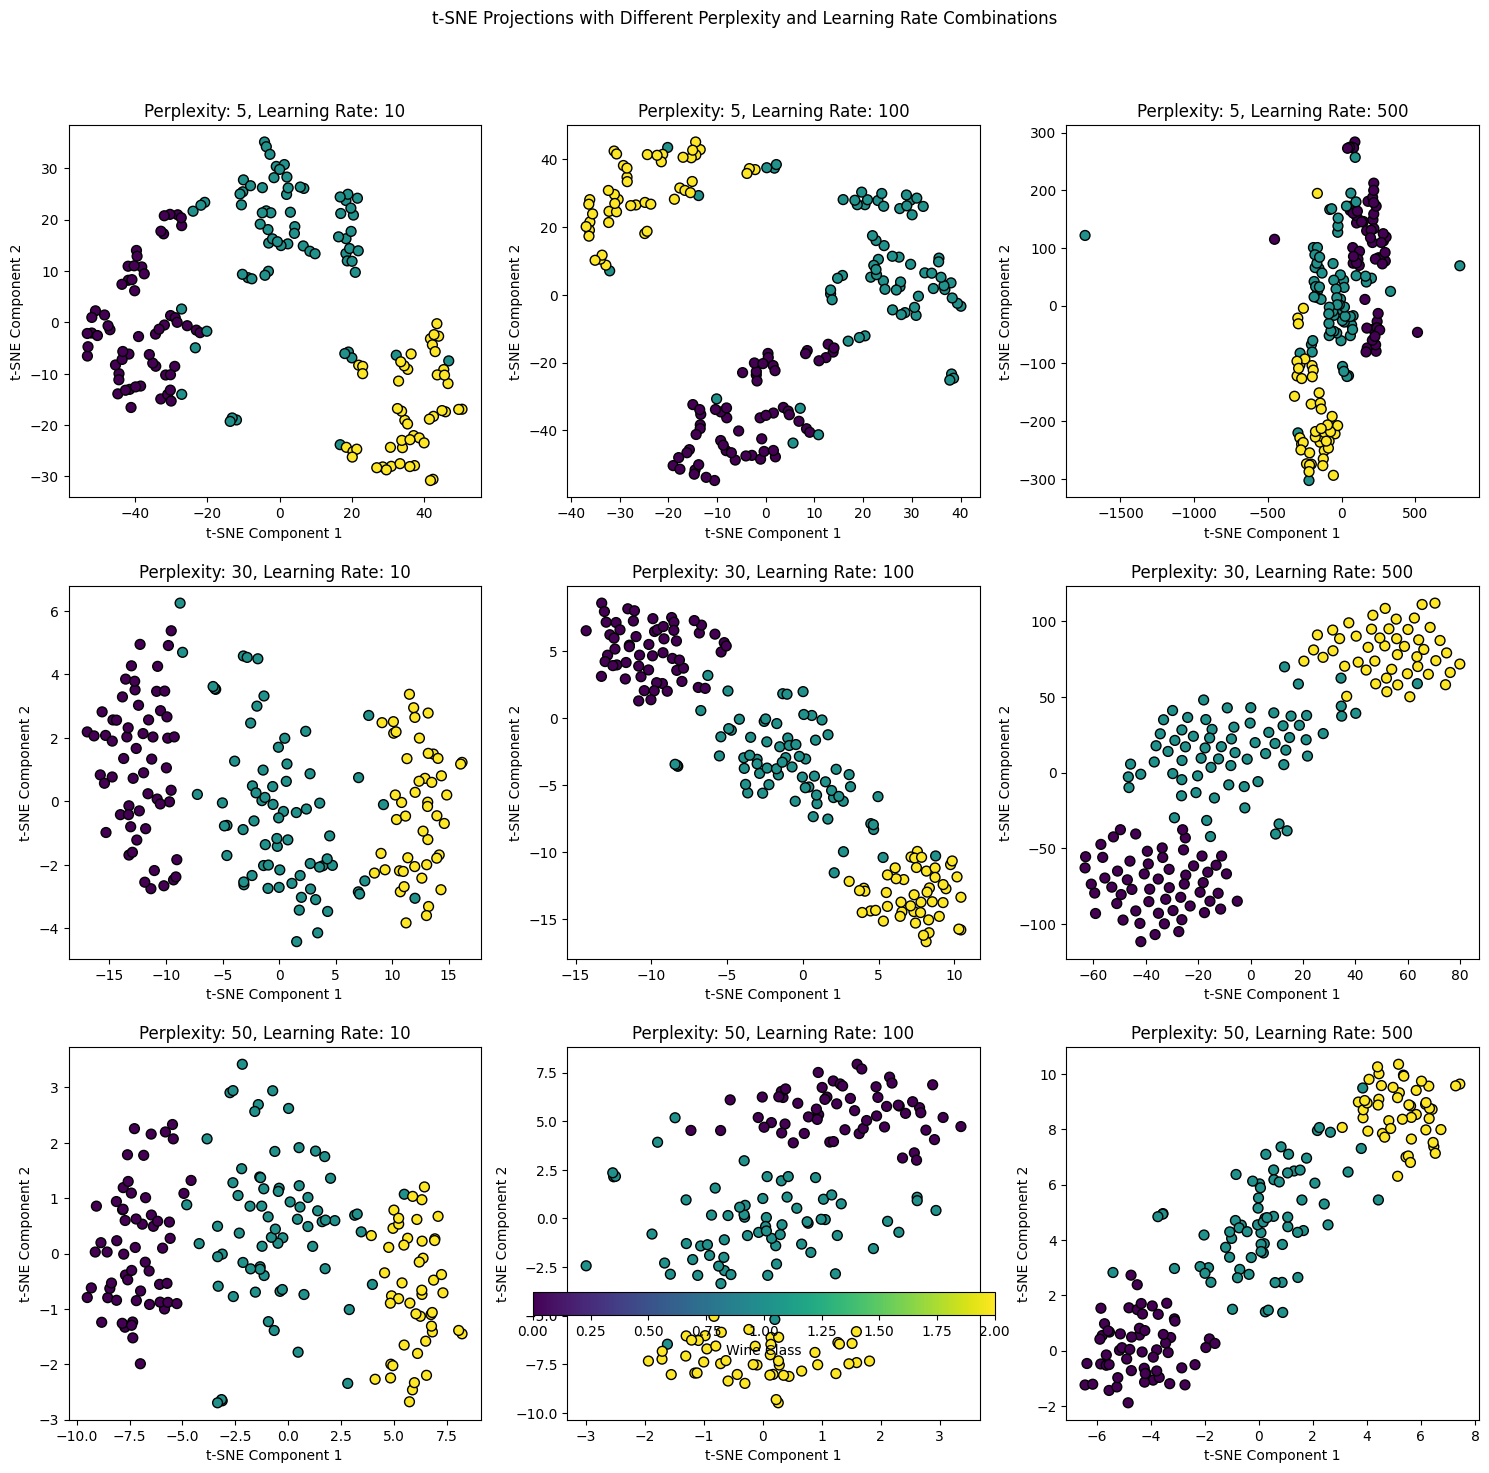

In [21]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Min-Max Scaling
X_minmax_scaled = MinMaxScaler().fit_transform(X)

# Define the parameter combinations
perplexities = [5, 30, 50]
learning_rates = [10, 100, 500]

# Loop through the parameter combinations
fig, axes = plt.subplots(len(perplexities), len(learning_rates), figsize=(15, 15))
fig.suptitle('t-SNE Projections with Different Perplexity and Learning Rate Combinations')

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        X_tsne = tsne.fit_transform(X_minmax_scaled)
        
        ax = axes[i, j]
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
        ax.set_title(f'Perplexity: {perplexity}, Learning Rate: {learning_rate}')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')

# Add a colorbar
fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1, label='Wine Class')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Explanation and Answering the reflected Quesions:

### 1. How does changing the perplexity and learning rate affect the resulting t-SNE projection?

- Perplexity: This parameter controls the balance between local and global aspects of the data. Lower perplexity values (e.g., 5) focus more on the local structure, meaning they emphasize the relationships between nearby points. Higher perplexity values (e.g., 50) consider a broader range of neighbors, capturing more global structure. In your plots, you might notice that lower perplexity values create more tightly clustered groups, while higher values spread the data out more evenly.
  
- Learning Rate: This parameter influences how quickly the optimization process converges. A very low learning rate (e.g., 10) might result in poor convergence, where the algorithm doesn't find a good representation of the data. A very high learning rate (e.g., 500) might cause the algorithm to overshoot the optimal solution, leading to a less stable projection. In your plots, you might see that moderate learning rates (e.g., 100) often provide a clearer separation between classes compared to very low or very high learning rates.

### 2. Which parameter combination provides the best separation between the different wine classes?

By visually inspecting the plots, you can determine which parameter combination provides the best separation. Typically, a moderate perplexity (e.g., 30) and a moderate learning rate (e.g., 100) often provide a good balance. As we can see in the visualzize image, look for the plot where the different wine classes (represented by different colors) are most distinctly separated with minimal overlap.

### 3. Why might that be the case?

- Perplexity: A moderate perplexity value (e.g., 30) balances the local and global structure, capturing the essential relationships without overfitting to noise. This balance helps in creating a more meaningful representation of the data.
  
- Learning Rate: A moderate learning rate (e.g., 100) ensures that the optimization process converges effectively without overshooting. This leads to a more stable and accurate representation of the data, allowing for clearer separation between classes.

and that is what i observed from the visualization according to my understandings.

# End of Assignment# 05_ Big Data (02423029_Suleman Khan)